The following csv data file contains data of diamonds with following characteristics.

carat - diamond's apparent size <br>
cut - how good the diamond shaping is <br>
color - colour of a diamond as letter representation <br>
clarity - clarity of diamond <br>
depth - depth of diamond <br>
table - top surface of diamond <br>
price - price of diamond <br>
x - x dimension <br>
y - y dimension<br>
z - z dimension <br>

Read the file and find the following:

1. Drop the unnamed column from the dataset once you read it  
2. The occurences of all unique colors of diamonds, bar chart of the same.     
3. Average price of each cut of diamond.  
4. Find the volume of every diamond and store it in a new column in the dataset. (volume = x*y*z)   
5. Histograms of Price and depths colums as two separate plots  
6. A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.  
7. Convert the categorical values of color, to numbers. i.e D, E, F, H, I, J to 0, 1, 2, 3, 4, 5 using Pandas methods only  
8. Which clarity(i.e the category) diamond has maximum mean depth?  
9. Find the diamond(i.e row) with minimum price per volume

 1.Drop the unnamed column from the dataset once you read it 

In [1]:
import pandas as pd
df= pd.read_csv("diamonds.csv")
df.head()
# df.drop([""],axis=1,inplace=True)
# df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


2.The occurences of all unique colors of diamonds, bar chart of the same. 

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


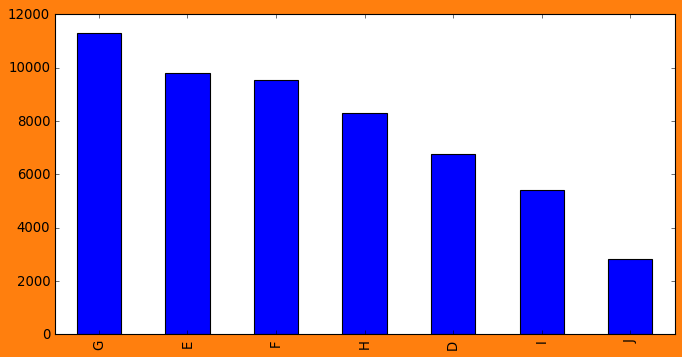

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
print(df['color'].value_counts())
plt.figure(figsize=[10,5],facecolor='#ff7f0e')
df['color'].value_counts().plot(kind='bar')

3.Average price of each cut of diamond. 

In [4]:
df1=df[['cut','price']]
df1.head()
for x,y in df1.groupby(['cut']):
    print(x,y['price'].mean())
print("OR")
df1.groupby(['cut']).mean()

Fair 4358.757763975155
Good 3928.864451691806
Ideal 3457.541970210199
Premium 4584.2577042999055
Very Good 3981.7598907465654
OR


,price
cut,
Fair,4358.757764
Good,3928.864452
Ideal,3457.541970
Premium,4584.257704
Very Good,3981.759891


4.Find the volume of every diamond and store it in a new column in the dataset. (volume = xyz) 

In [5]:
df['volume']=(df['x']*df['y']*df['z'])
df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


5.Histograms of Price and depths colums as two separate plots 

(array([25335.,  9328.,  7393.,  3878.,  2364.,  1745.,  1306.,  1002.,
          863.,   726.]),
 array([  326. ,  2175.7,  4025.4,  5875.1,  7724.8,  9574.5, 11424.2,
        13273.9, 15123.6, 16973.3, 18823. ]),
 <a list of 10 Patch objects>)

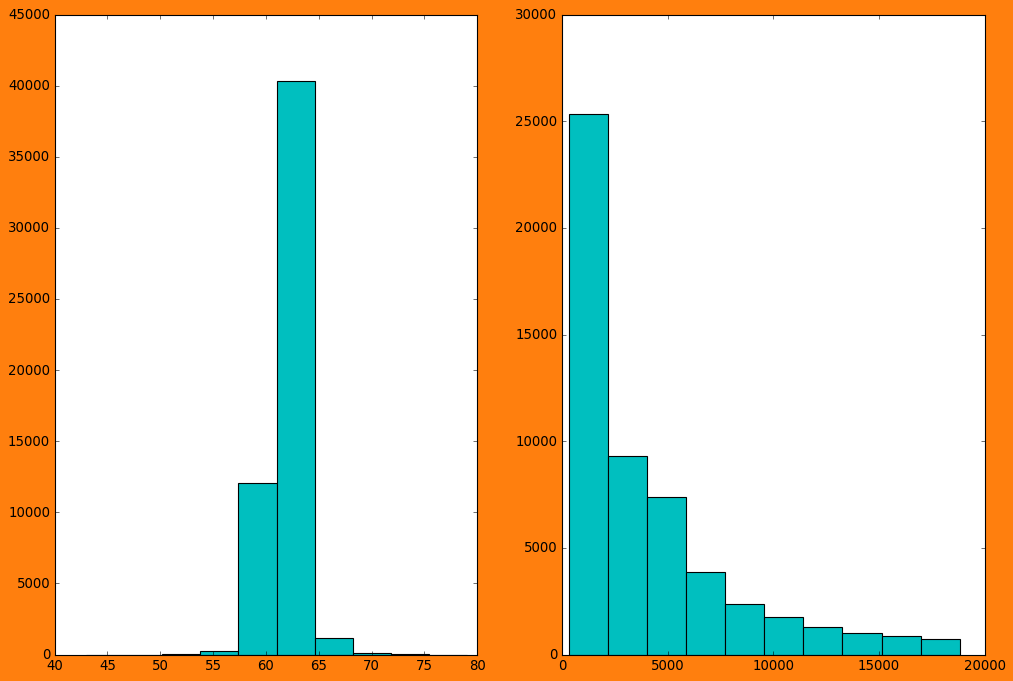

In [6]:
p=df['price']
d=df['depth']
plt.figure(figsize=[15,10],facecolor='#ff7f0e')
plt.subplot(1,2,1)
plt.hist(d,10,color='c',cumulative=False)
plt.subplot(1,2,2)
plt.hist(p,10,color='c',cumulative=False)

 6.A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.  

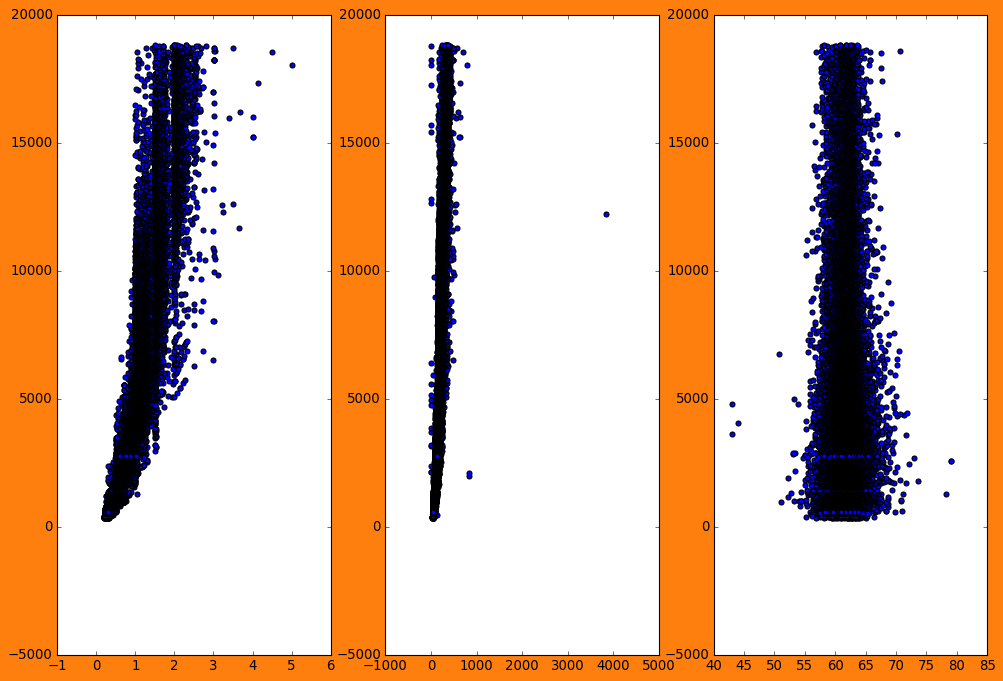

In [7]:
import matplotlib.pyplot as plt
a=df[['carat']]
b=df[['price']]
c=df[['volume']]
d=df[['depth']]
plt.figure(figsize=[15,10],facecolor='#ff7f0e')
plt.subplot(1,3,1)
plt.scatter(a,b)
plt.subplot(1,3,2)
plt.scatter(c,b)
plt.subplot(1,3,3)
plt.scatter(d,b)

7.Convert the categorical values of color, to numbers. i.e D, E, F, H, I, J to 0, 1, 2, 3, 4, 5 using Pandas methods only  

In [8]:
 m={'D':0,'E':1,'F':2,'H':3,'I':4,'J':5,'G':6}
# df['color']=df['color'].apply(lambda i:m[i])
df['color']=df['color'].map(m)

df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,1,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,1,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,1,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,4,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,5,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,0,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,Good,0,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,0,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,Premium,3,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


8.Which clarity(i.e the category) diamond has maximum mean depth? 

In [9]:
x=df[['clarity','depth']]
de=[]
de1=[]
m=dict()
for x,y in df.groupby('clarity'):
    de.append(y['depth'].mean())
    de1.append(x)
for i in range(len(de)):
        m[de1[i]]=de[i]
val=list(m.values())
val.sort()
r=val[-1]
res = dict((v,k) for k,v in m.items())
print(res[r],"has maximum mean depth with",r)


I1 has maximum mean depth with 62.734278002699014


9.Find the diamond(i.e row) with minimum price per volume

In [75]:
df['p/v']=df['price']/df['volume']
gs=df[(df['p/v']==df['p/v'].min())]
gs

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,...,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,volume,p/v
48410,48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,...,62.734278,61.510615,61.853042,61.772167,61.667458,61.724417,61.624651,61.663778,838.5024,2.349427
